In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms

import sys

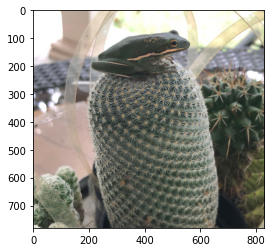

In [5]:
embdict = {}
path_img = '/content/drive/MyDrive/Qualtrics_Annotator/strange_pictures/strange11.PNG'
image = Image.open(path_img)
model = models.resnet50(pretrained=True).to(device)
feat_vector = predict(image, model)


plt.imshow(image)
plt.show()
embdict[0] = feat_vector

In [6]:
print(embdict[0].shape)

torch.Size([1, 1000])

In [8]:
class Image_embedding:
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  def __init__(self, model_name):
    if  model_name == 'resnet50':
      self.model = models.resnet50(pretrained=True).to(device)
    else:
      sys.exit(0)

  def prepare_image(image):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    if image.mode != 'RGB':
      image = image.convert("RGB")
      Transform = transforms.Compose([
              transforms.Resize([224,224]),      
              transforms.ToTensor(),
              ])
    image = Transform(image)   
    image = image.unsqueeze(0)
    return image.to(device)

  def predict(image, model):
    image = prepare_image(image)
    with torch.no_grad():
      preds = model(image)
    #print('Embedding Shape: \t',  preds.shape)
    return preds